# OpenClassrooms Parcours Data Scientist
## Hugo REBEIX
# Projet 2 : Analysez des données de systèmes éducatifs

____________________________________________________________________________________________________________________________________________________________________
### Contexte
Vous êtes Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.
Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.
### Source de données
La source de données est la banque mondiale de la Data qui fournit de nombreux indicateurs sur des sujets tels que la santé, l'éducation, l'agriculture, l'accès à internet etc...
### Objectifs 
#### Quels sont les pays avec un fort potentiel de clients pour nos services ?
#### Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
#### Dans quels pays l'entreprise doit-elle opérer en priorité ?
### Missions:
#### Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
#### Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
#### Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
#### Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)
___________________________________________________________________________________________________________________________________________________________________

NB : la donnée exploitée a fait l'objet de jointures dans un autre notebook présent dans le même repository [Voir le notebook](data_merging.ipynb)
Dans ce notebook, nous étudierons la donnée brute afin de comprendre sa structure pour en tirer les informations générales sur son remplisage. Nous procederons ainsi à un nettoyage. Ensuite nous identifierons des indicateurs clés pour selectionner certains pays et observer les perspectives de marché.

## Sommaire
#### [Analyse préliminaire](#section_1)
#### [Nettoyage](#section_2)
#### [Analyse des indicateurs et selection des pays](#section_3)
#### [Visualisations et projections](#section_4)
#### [Conclusion](#section_5)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data/data_raw.csv')

C:\Users\S053567\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (95,96,97,98,100,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,120,122) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<a id='section_1'></a>
## Analyse préliminaire

In [3]:
data.shape

(870492, 124)

In [4]:
describe = data.describe(include='all')

In [5]:
describe

,Unnamed: 0,Country Name,Country Code,Indicator Name_x,Indicator Code,1970,1971,1972,1973,1974,...,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31,DESCRIPTION,Unnamed: 3
count,870492.000000,870492,870492,870492,870492,7.148000e+04,3.444300e+04,3.451400e+04,3.446700e+04,3.467500e+04,...,509292,577920,400932,512904.0,386484.000000,668220.000000,646548.0,0.0,613,0.0
unique,NaN,241,241,3612,3612,NaN,NaN,NaN,NaN,NaN,...,60,75,2,44.0,NaN,NaN,21.0,NaN,97,NaN
top,NaN,Namibia,POL,Percentage of enrolment in early childhood edu...,BAR.TER.ICMP.3034.ZS,NaN,NaN,NaN,NaN,NaN,...,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2012",Yes,2010.0,NaN,NaN,2005.0,NaN,Data sources : United Nations World Population...,NaN
freq,NaN,3612,3612,241,241,NaN,NaN,NaN,NaN,NaN,...,36120,54180,397320,82920.0,NaN,NaN,144480.0,NaN,154,NaN
mean,435245.500000,NaN,NaN,NaN,NaN,1.997095e+09,4.388745e+09,4.739394e+09,5.264671e+09,5.565835e+09,...,NaN,NaN,NaN,NaN,2008.102804,2010.994595,NaN,NaN,NaN,NaN
std,251289.539602,NaN,NaN,NaN,NaN,1.218514e+11,1.833238e+11,1.944465e+11,2.091105e+11,2.144020e+11,...,NaN,NaN,NaN,NaN,2.604581,2.562723,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,...,NaN,NaN,NaN,NaN,2000.000000,1995.000000,NaN,NaN,NaN,NaN
25%,217622.750000,NaN,NaN,NaN,NaN,8.700000e-01,1.045615e+01,1.076718e+01,1.116327e+01,1.131197e+01,...,NaN,NaN,NaN,NaN,2007.000000,2011.000000,NaN,NaN,NaN,NaN
50%,435245.500000,NaN,NaN,NaN,NaN,6.570000e+00,7.207677e+01,7.685992e+01,7.963683e+01,8.090797e+01,...,NaN,NaN,NaN,NaN,2009.000000,2012.000000,NaN,NaN,NaN,NaN
75%,652868.250000,NaN,NaN,NaN,NaN,6.387674e+01,6.452600e+04,6.653125e+04,6.973650e+04,7.127600e+04,...,NaN,NaN,NaN,NaN,2010.000000,2012.000000,NaN,NaN,NaN,NaN


Faisons un état des lieux du set de données non nettoyé

In [6]:
nb_rows = len(data)
nb_rows

870492

In [7]:
counts = describe.iloc[0]

In [8]:
counts = np.array(counts)
counts_freq = counts/nb_rows
xlabel1 = data.columns[:int(len(data.columns)/2)]
xlabel2 = data.columns[int(len(data.columns)/2):]
counts_freq1 = counts_freq[:int(len(data.columns)/2)]
counts_freq2 = counts_freq[int(len(data.columns)/2):]

<BarContainer object of 62 artists>

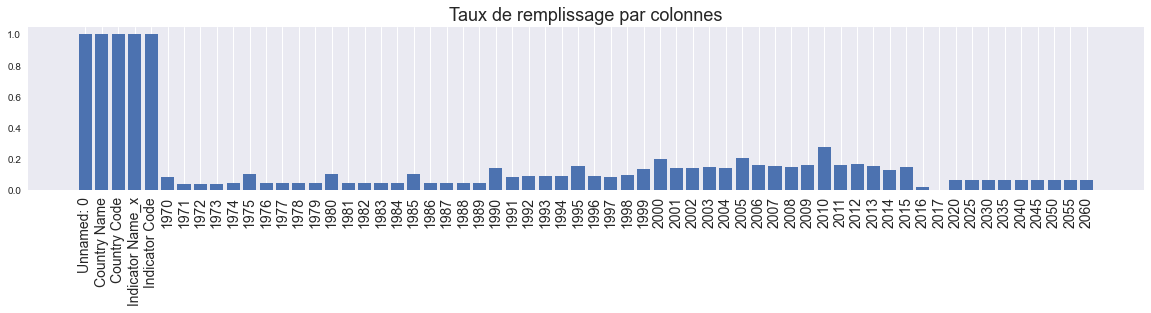

In [9]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn')
plt.title("Taux de remplissage par colonnes", fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.grid(False, axis='y')
plt.bar(xlabel1, counts_freq1, align='center')
# plt.savefig("rempl_col_1.png", orientation='landscape', bbox_inches='tight', quality=0.95)

<BarContainer object of 62 artists>

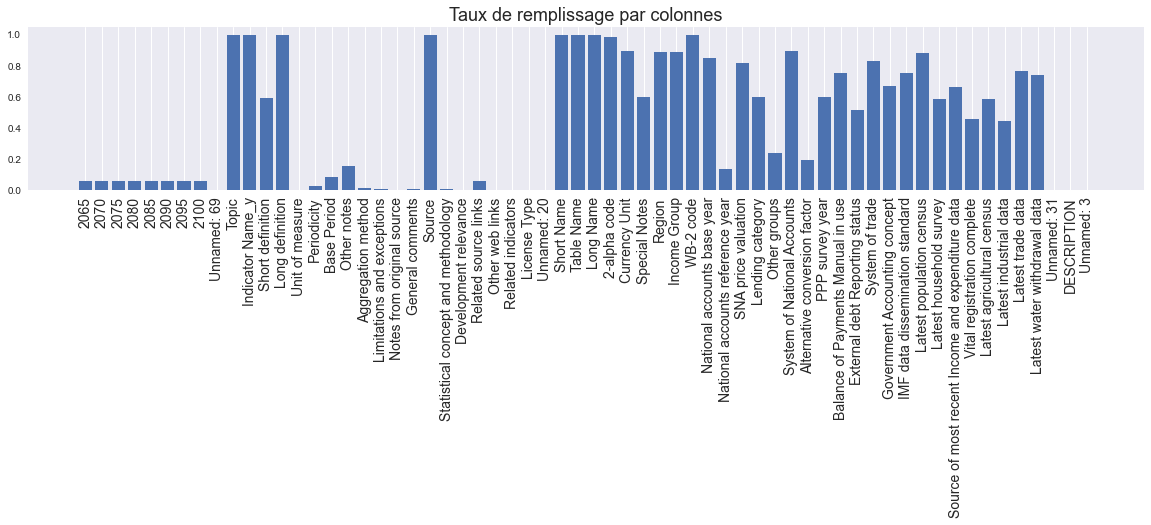

In [10]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn')
plt.title("Taux de remplissage par colonnes", fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.grid(False, axis='y')
plt.bar(xlabel2, counts_freq2, align='center')
# plt.savefig("rempl_col_2.png", orientation='landscape', bbox_inches='tight', quality=0.95)

In [11]:
cells_total = data.size
filled_cells = counts.sum()
empty_cells = cells_total - filled_cells

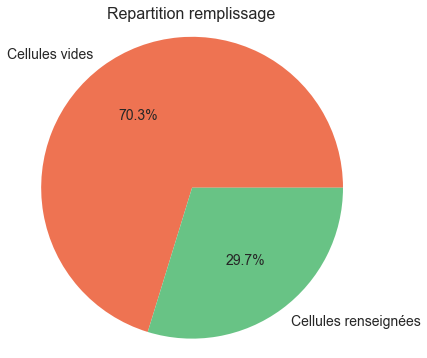

In [12]:
fig = plt.figure(figsize=(6,6))
plt.title('Repartition remplissage', fontsize=16)
plt.pie([empty_cells, filled_cells], labels=['Cellules vides', 'Cellules renseignées'], colors=['#EE7352', '#68C385'], autopct='%1.1f%%', textprops={'fontsize': 14})
plt.axis('equal')
# plt.savefig("rempl_abs.png", orientation='landscape', bbox_inches='tight', quality=0.95)
plt.show()


### Explorons le taux de remplissage des colonnes années

Il y a deux types de données pour les indicateurs par années. Il y a les données collectées (passé) et les données pour le future qui sont des predictions

In [13]:
years = np.array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'])

In [14]:
describe = data[years].describe()

In [15]:
describe

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
count,7.148000e+04,3.444300e+04,3.451400e+04,3.446700e+04,3.467500e+04,8.618600e+04,3.629500e+04,3.646100e+04,3.647900e+04,3.562900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04
mean,1.997095e+09,4.388745e+09,4.739394e+09,5.264671e+09,5.565835e+09,2.344362e+09,5.919418e+09,6.311390e+09,6.872114e+09,7.683021e+09,...,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02
std,1.218514e+11,1.833238e+11,1.944465e+11,2.091105e+11,2.144020e+11,1.383962e+11,2.251490e+11,2.360692e+11,2.510883e+11,2.704629e+11,...,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01
25%,8.700000e-01,1.045615e+01,1.076718e+01,1.116327e+01,1.131197e+01,1.400000e+00,1.090664e+01,1.094854e+01,1.122621e+01,1.129145e+01,...,3.000000e-02,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02
50%,6.570000e+00,7.207677e+01,7.685992e+01,7.963683e+01,8.090797e+01,1.000000e+01,7.923435e+01,7.883617e+01,8.004732e+01,8.322935e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01
75%,6.387674e+01,6.452600e+04,6.653125e+04,6.973650e+04,7.127600e+04,8.009500e+01,6.440950e+04,6.504500e+04,6.682050e+04,7.146500e+04,...,7.500000e+00,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.813670e+06,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06


In [16]:
years = years.astype(int)

In [17]:
filter_past = years < 2020
filter_future = years > 2019

In [18]:
years_past = years[filter_past]
years_future = years[filter_future]

In [19]:
counts_past = describe[years_past.astype(str)].iloc[0]
counts_future = describe[years_future.astype(str)].iloc[0]

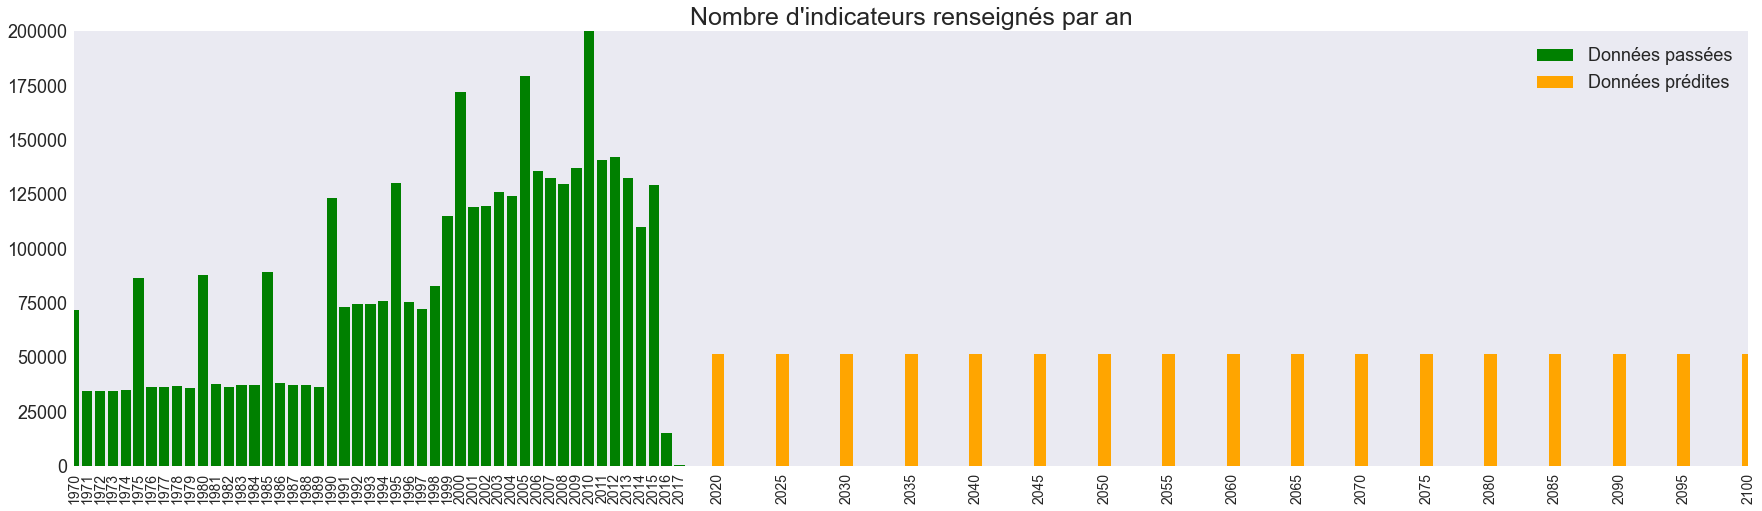

In [20]:
fig = plt.figure(figsize=(30,8))
plt.title("Nombre d'indicateurs renseignés par an", fontsize=25)
plt.axis([1970, 2100, 0, 200000])

plt.bar(years_past, counts_past, color='g', label='Données passées')
plt.bar(years_future, counts_future, color='orange', width=1, label='Données prédites')
plt.xticks(years[years < 2101], rotation=90, fontsize=14)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.grid(None)
# plt.savefig("nb_indic_an.png", orientation='landscape', bbox_inches='tight', quality=0.95)

Pas de données sures après 2017. Les predicitions ont commencées en 2020. On voit que beaucoup d'indicateurs ne sont rensignés que tous les 5 ans, tout comme les prédictions

In [21]:
# list(data[data['2030'] != np.nan]['Indicator Name_x'].unique())

<a id='section_2'></a>
## Nettoyage

Retirons les colonnes vides

In [22]:
describe = data.describe(include='all')
counts = describe.iloc[0]

In [23]:
counts

Unnamed: 0                      870492
Country Name                    870492
Country Code                    870492
Indicator Name_x                870492
Indicator Code                  870492
                                 ...  
Latest trade data               668220
Latest water withdrawal data    646548
Unnamed: 31                          0
DESCRIPTION                        613
Unnamed: 3                           0
Name: count, Length: 124, dtype: object

In [24]:
useless_cols = counts[counts/len(data) < 0.25]

In [25]:
useless_cols.index

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050',
       '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095',
       '2100', 'Unnamed: 69', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20', 'National accounts reference year',
       'Other groups

Je ne veux pas retirer les colonnes concernant les années car c'est là ou se situe la valeur ajoutée

In [26]:
useless_cols

1970                              71480
1971                              34443
1972                              34514
1973                              34467
1974                              34675
                                  ...  
Other groups                     209496
Alternative conversion factor    169764
Unnamed: 31                           0
DESCRIPTION                         613
Unnamed: 3                            0
Name: count, Length: 86, dtype: object

In [27]:
useless_cols = pd.DataFrame(useless_cols)

In [28]:
useless_cols['index'] = useless_cols.index

In [29]:
year_test = lambda name : not name.isdigit()
useless_cols = useless_cols[useless_cols['index'].map(year_test)]

In [30]:
useless_cols

,count,index
Unnamed: 69,0,Unnamed: 69
Unit of measure,0,Unit of measure
Periodicity,23859,Periodicity
Base Period,75674,Base Period
Other notes,132068,Other notes
Aggregation method,11327,Aggregation method
Limitations and exceptions,3374,Limitations and exceptions
Notes from original source,0,Notes from original source
General comments,3374,General comments
Statistical concept and methodology,5543,Statistical concept and methodology


Je pense que la colonne 'Statistical concept and methodology' peut tout de même être pertinente

In [31]:
useless_cols = useless_cols.drop(index='Statistical concept and methodology')

In [32]:
useless_cols.head(21)

,count,index
Unnamed: 69,0,Unnamed: 69
Unit of measure,0,Unit of measure
Periodicity,23859,Periodicity
Base Period,75674,Base Period
Other notes,132068,Other notes
Aggregation method,11327,Aggregation method
Limitations and exceptions,3374,Limitations and exceptions
Notes from original source,0,Notes from original source
General comments,3374,General comments
Development relevance,723,Development relevance


In [33]:
data = data.drop(columns=useless_cols.index)

In [34]:
data.shape

(870492, 103)

In [35]:
cols = data.columns
cols

Index(['Unnamed: 0', 'Country Name', 'Country Code', 'Indicator Name_x',
       'Indicator Code', '1970', '1971', '1972', '1973', '1974',
       ...
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object', length=103)

In [36]:
indicateurs = data['Indicator Name_x'].unique()

In [37]:
indicateurs[:5]

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       'Adjusted net enrolment rate, lower secondary, male (%)',
       'Adjusted net enrolment rate, primary, both sexes (%)'],
      dtype=object)

In [38]:
print(data.columns)

Index(['Unnamed: 0', 'Country Name', 'Country Code', 'Indicator Name_x',
       'Indicator Code', '1970', '1971', '1972', '1973', '1974',
       ...
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object', length=103)


Il reste encore beaucoup trop de colonnes.

In [39]:
kpi_columns = data[['Indicator Name_x', 'Indicator Name_y']]

In [40]:
kpi_columns

,Indicator Name_x,Indicator Name_y
0,"Adjusted net enrolment rate, lower secondary, ...","Adjusted net enrolment rate, lower secondary, ..."
1,"Adjusted net enrolment rate, lower secondary, ...","Adjusted net enrolment rate, lower secondary, ..."
2,"Adjusted net enrolment rate, lower secondary, ...","Adjusted net enrolment rate, lower secondary, ..."
3,"Adjusted net enrolment rate, lower secondary, ...","Adjusted net enrolment rate, lower secondary, ..."
4,"Adjusted net enrolment rate, primary, both sex...","Adjusted net enrolment rate, primary, both sex..."
...,...,...
870487,"Youth illiterate population, 15-24 years, % fe...","Youth illiterate population, 15-24 years, % fe..."
870488,"Youth literacy rate, population 15-24 years, b...","Youth literacy rate, population 15-24 years, b..."
870489,"Youth literacy rate, population 15-24 years, f...","Youth literacy rate, population 15-24 years, f..."
870490,"Youth literacy rate, population 15-24 years, g...","Youth literacy rate, population 15-24 years, g..."


In [41]:
kpi_columns.describe()

,Indicator Name_x,Indicator Name_y
count,870492,870492
unique,3612,3612
top,Percentage of enrolment in early childhood edu...,Percentage of enrolment in early childhood edu...
freq,241,241


In [42]:
data = data.drop(columns=['Indicator Name_y'])

In [43]:
data['Unnamed: 0']

0              0
1              1
2              2
3              3
4              4
           ...  
870487    870487
870488    870488
870489    870489
870490    870490
870491    870491
Name: Unnamed: 0, Length: 870492, dtype: int64

c'est une copie des index

In [44]:
data = data.drop(columns=['Unnamed: 0'])

## Evaluons le contenu de chacunes des cols

In [45]:
useless_cols_manual = []

In [46]:
data.columns[69]

'Topic'

In [47]:
data.Topic

0         Secondary
1         Secondary
2         Secondary
3         Secondary
4           Primary
            ...    
870487     Literacy
870488     Literacy
870489     Literacy
870490     Literacy
870491     Literacy
Name: Topic, Length: 870492, dtype: object

In [48]:
data.Topic.unique()

array(['Secondary', 'Primary', 'Literacy', 'Teachers', 'EMIS',
       'Expenditures', 'Attainment', 'Education Equality', 'Background',
       'Learning Outcomes', 'Early Childhood Education', 'Tertiary',
       'Post-Secondary/Non-Tertiary',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Pre-Primary', 'Infrastructure: Communications',
       'Social Protection & Labor: Labor force structure',
       'Health: Mortality', 'Health: Population: Dynamics', 'Population',
       'Health: Population: Structure', 'Health: Risk factors',
       'Early Child Development (SABER)',
       'Education Management Information Systems (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Auto

Topic est interessant

In [49]:
data.columns[70]

'Short definition'

In [50]:
data.columns[71]

'Long definition'

Je ne garde que la longue définition

In [51]:
useless_cols_manual.append(data.columns[70])

In [52]:
useless_cols_manual

['Short definition']

In [53]:
data.columns[72]

'Source'

In [54]:
data.Source

0         UNESCO Institute for Statistics
1         UNESCO Institute for Statistics
2         UNESCO Institute for Statistics
3         UNESCO Institute for Statistics
4         UNESCO Institute for Statistics
                       ...               
870487    UNESCO Institute for Statistics
870488    UNESCO Institute for Statistics
870489    UNESCO Institute for Statistics
870490    UNESCO Institute for Statistics
870491    UNESCO Institute for Statistics
Name: Source, Length: 870492, dtype: object

In [55]:
data.columns[73]

'Statistical concept and methodology'

In [56]:
data['Statistical concept and methodology']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
870487    NaN
870488    NaN
870489    NaN
870490    NaN
870491    NaN
Name: Statistical concept and methodology, Length: 870492, dtype: object

In [57]:
data['Statistical concept and methodology'].unique()

array([nan,
       'The standard definition of unemployed persons is those individuals without work in a recent past period, and currently available for and seeking for employment. But there may be persons who do not actively "seek" work because they view job opportunities as limited, or because they have restricted labour mobility, or face discrimination, or structural, social or cultural barriers. NEET rates capture more broadly untapped potential youth, including such individuals who want to work but are not seeking work (often called the "hidden unemployed" or "discouraged workers").\n\nYouth are defined as persons ages 15 to 24; young adults are those ages 25 to 29; and adults are those ages 25 and above. However, countries vary somewhat in their operational definitions. In particular, the lower age limit for young people is usually determined by the minimum age for leaving school, where this exists.',
       'TIMSS'], dtype=object)

In [58]:
useless_cols_manual.append(data.columns[73])

In [59]:
data.columns[74]

'Short Name'

In [60]:
data['Short Name']

0         Arab World
1         Arab World
2         Arab World
3         Arab World
4         Arab World
             ...    
870487      Zimbabwe
870488      Zimbabwe
870489      Zimbabwe
870490      Zimbabwe
870491      Zimbabwe
Name: Short Name, Length: 870492, dtype: object

In [61]:
data['Country Name']

0         Arab World
1         Arab World
2         Arab World
3         Arab World
4         Arab World
             ...    
870487      Zimbabwe
870488      Zimbabwe
870489      Zimbabwe
870490      Zimbabwe
870491      Zimbabwe
Name: Country Name, Length: 870492, dtype: object

C'est un doublon

In [62]:
useless_cols_manual.append(data.columns[74])

In [63]:
data.columns[75]

'Table Name'

In [64]:
data[data.columns[75]]

0         Arab World
1         Arab World
2         Arab World
3         Arab World
4         Arab World
             ...    
870487      Zimbabwe
870488      Zimbabwe
870489      Zimbabwe
870490      Zimbabwe
870491      Zimbabwe
Name: Table Name, Length: 870492, dtype: object

encore un doublon 

In [65]:
useless_cols_manual.append(data.columns[75])

In [66]:
data.columns[76]

'Long Name'

In [67]:
data[data.columns[76]]

0                   Arab World
1                   Arab World
2                   Arab World
3                   Arab World
4                   Arab World
                  ...         
870487    Republic of Zimbabwe
870488    Republic of Zimbabwe
870489    Republic of Zimbabwe
870490    Republic of Zimbabwe
870491    Republic of Zimbabwe
Name: Long Name, Length: 870492, dtype: object

encore un doublon

In [68]:
useless_cols_manual.append(data.columns[76])

In [69]:
data[data.columns[77]]

0         1A
1         1A
2         1A
3         1A
4         1A
          ..
870487    ZW
870488    ZW
870489    ZW
870490    ZW
870491    ZW
Name: 2-alpha code, Length: 870492, dtype: object

In [70]:
useless_cols_manual.append(data.columns[77])

In [71]:
data[data.columns[78]]

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
870487    U.S. dollar
870488    U.S. dollar
870489    U.S. dollar
870490    U.S. dollar
870491    U.S. dollar
Name: Currency Unit, Length: 870492, dtype: object

In [72]:
useless_cols_manual.append(data.columns[78])

In [73]:
data[data.columns[79]]

0         Arab World aggregate. Arab World is composed o...
1         Arab World aggregate. Arab World is composed o...
2         Arab World aggregate. Arab World is composed o...
3         Arab World aggregate. Arab World is composed o...
4         Arab World aggregate. Arab World is composed o...
                                ...                        
870487    Fiscal year end: June 30; reporting period for...
870488    Fiscal year end: June 30; reporting period for...
870489    Fiscal year end: June 30; reporting period for...
870490    Fiscal year end: June 30; reporting period for...
870491    Fiscal year end: June 30; reporting period for...
Name: Special Notes, Length: 870492, dtype: object

In [74]:
data[data.columns[79]].iloc[0]

'Arab World aggregate. Arab World is composed of members of the League of Arab States.'

In [75]:
data[data.columns[79]][870466]

'Fiscal year end: June 30; reporting period for national accounts data: CY. As of January 2009, multiple hard currencies, such as rand, pound sterling, euro and U.S. dollar are in use. Data are reported in U.S. dollars, the most-used currency.'

Cette colonne contient des informations à propos du pays concerné par la ligne. Je décide de la garder pour l'instant

In [76]:
data[data.columns[80]]

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4                        NaN
                 ...        
870487    Sub-Saharan Africa
870488    Sub-Saharan Africa
870489    Sub-Saharan Africa
870490    Sub-Saharan Africa
870491    Sub-Saharan Africa
Name: Region, Length: 870492, dtype: object

La région m'interesse dans l'idée de détecter des zones géographiques plus que des pays

In [77]:
data[data.columns[81]]

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
870487    Low income
870488    Low income
870489    Low income
870490    Low income
870491    Low income
Name: Income Group, Length: 870492, dtype: object

In [78]:
data[data.columns[81]].unique()

array([nan, 'Low income', 'Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD'], dtype=object)

In [79]:
data[data.columns[82]]

0         1A
1         1A
2         1A
3         1A
4         1A
          ..
870487    ZW
870488    ZW
870489    ZW
870490    ZW
870491    ZW
Name: WB-2 code, Length: 870492, dtype: object

In [80]:
useless_cols_manual.append(data.columns[82])

In [81]:
data[data.columns[83]]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
870487    2009
870488    2009
870489    2009
870490    2009
870491    2009
Name: National accounts base year, Length: 870492, dtype: object

In [82]:
useless_cols_manual.append(data.columns[83])

In [83]:
data[data.columns[84]]

0                                       NaN
1                                       NaN
2                                       NaN
3                                       NaN
4                                       NaN
                        ...                
870487    Value added at basic prices (VAB)
870488    Value added at basic prices (VAB)
870489    Value added at basic prices (VAB)
870490    Value added at basic prices (VAB)
870491    Value added at basic prices (VAB)
Name: SNA price valuation, Length: 870492, dtype: object

In [84]:
data[data.columns[84]].unique()

array([nan, 'Value added at basic prices (VAB)',
       'Value added at producer prices (VAP)'], dtype=object)

In [85]:
useless_cols_manual.append(data.columns[84])

In [86]:
data[data.columns[85]]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
870487    Blend
870488    Blend
870489    Blend
870490    Blend
870491    Blend
Name: Lending category, Length: 870492, dtype: object

In [87]:
data[data.columns[85]].unique()

array([nan, 'IDA', 'IBRD', 'Blend'], dtype=object)

Lending veut dire prêt. Cette donnée n'apporte rien

In [88]:
useless_cols_manual.append(data.columns[85])

In [89]:
data[data.columns[86]]

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
870487    Country uses the 1993 System of National Accou...
870488    Country uses the 1993 System of National Accou...
870489    Country uses the 1993 System of National Accou...
870490    Country uses the 1993 System of National Accou...
870491    Country uses the 1993 System of National Accou...
Name: System of National Accounts, Length: 870492, dtype: object

In [90]:
useless_cols_manual.append(data.columns[86])

In [91]:
data[data.columns[87]]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
870487    2005
870488    2005
870489    2005
870490    2005
870491    2005
Name: PPP survey year, Length: 870492, dtype: object

In [92]:
useless_cols_manual.append(data.columns[87])

In [93]:
data[data.columns[88]]

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4                                                  NaN
                              ...                     
870487    IMF Balance of Payments Manual, 6th edition.
870488    IMF Balance of Payments Manual, 6th edition.
870489    IMF Balance of Payments Manual, 6th edition.
870490    IMF Balance of Payments Manual, 6th edition.
870491    IMF Balance of Payments Manual, 6th edition.
Name: Balance of Payments Manual in use, Length: 870492, dtype: object

In [94]:
useless_cols_manual.append(data.columns[88])

In [95]:
data[data.columns[89]]

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
870487    Actual
870488    Actual
870489    Actual
870490    Actual
870491    Actual
Name: External debt Reporting status, Length: 870492, dtype: object

In [96]:
useless_cols_manual.append(data.columns[89])

In [97]:
data[data.columns[90]]

0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
                  ...         
870487    General trade system
870488    General trade system
870489    General trade system
870490    General trade system
870491    General trade system
Name: System of trade, Length: 870492, dtype: object

In [98]:
data[data.columns[90]].unique()

array([nan, 'General trade system', 'Special trade system'], dtype=object)

In [99]:
useless_cols_manual.append(data.columns[90])

In [100]:
data[data.columns[91]]

0                                     NaN
1                                     NaN
2                                     NaN
3                                     NaN
4                                     NaN
                       ...               
870487    Consolidated central government
870488    Consolidated central government
870489    Consolidated central government
870490    Consolidated central government
870491    Consolidated central government
Name: Government Accounting concept, Length: 870492, dtype: object

In [101]:
useless_cols_manual.append(data.columns[91])

In [102]:
data[data.columns[92]]

0                                              NaN
1                                              NaN
2                                              NaN
3                                              NaN
4                                              NaN
                            ...                   
870487    General Data Dissemination System (GDDS)
870488    General Data Dissemination System (GDDS)
870489    General Data Dissemination System (GDDS)
870490    General Data Dissemination System (GDDS)
870491    General Data Dissemination System (GDDS)
Name: IMF data dissemination standard, Length: 870492, dtype: object

In [103]:
data[data.columns[92]].unique()

array([nan, 'General Data Dissemination System (GDDS)',
       'Special Data Dissemination Standard (SDDS)'], dtype=object)

In [104]:
useless_cols_manual.append(data.columns[92])

In [105]:
data[data.columns[93]]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
870487    2012
870488    2012
870489    2012
870490    2012
870491    2012
Name: Latest population census, Length: 870492, dtype: object

In [106]:
data[data.columns[93]].unique()

array([nan, 1979.0, 2011.0, 2008.0, '2008', '2010',
       '2011. Population figures compiled from administrative registers.',
       '1970', '2011', 2010, '2009', 2009, 2013, 2005, 2012, 2006, 2003,
       '2003', 'Guernsey: 2009; Jersey: 2011.', '2012', 1984, 2007, 1998,
       2002, '2006. Rolling census based on continuous sample survey.',
       '2007', 1996, '2013',
       '2011. The population censuses for 1986 and 1996 were based on a one-in-seven sample of the population, while that for 2006 was based on a one-in-ten sample of the population.',
       1997, 2004, 1970, 1993, 1983.0, '1987', 1987, 2001, 1989],
      dtype=object)

Cette colonne est interessante mais elle necessite un nettoyage

In [107]:
data[data.columns[94]]

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4                                                  NaN
                              ...                     
870487    Demographic and Health Survey (DHS), 2010/11
870488    Demographic and Health Survey (DHS), 2010/11
870489    Demographic and Health Survey (DHS), 2010/11
870490    Demographic and Health Survey (DHS), 2010/11
870491    Demographic and Health Survey (DHS), 2010/11
Name: Latest household survey, Length: 870492, dtype: object

In [108]:
useless_cols_manual.append(data.columns[94])

In [109]:
data[data.columns[95]]

0                                                NaN
1                                                NaN
2                                                NaN
3                                                NaN
4                                                NaN
                             ...                    
870487    Integrated household survey (IHS), 2011/12
870488    Integrated household survey (IHS), 2011/12
870489    Integrated household survey (IHS), 2011/12
870490    Integrated household survey (IHS), 2011/12
870491    Integrated household survey (IHS), 2011/12
Name: Source of most recent Income and expenditure data, Length: 870492, dtype: object

In [110]:
useless_cols_manual.append(data.columns[95])

In [111]:
data[data.columns[96]]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
870487    NaN
870488    NaN
870489    NaN
870490    NaN
870491    NaN
Name: Vital registration complete, Length: 870492, dtype: object

In [112]:
data[data.columns[96]].unique()

array([nan, 'Yes', 'Yes. Vital registration for Guernsey and Jersey.'],
      dtype=object)

Que des 'yes' ou NaN. On supprime

In [113]:
useless_cols_manual.append(data.columns[96])

In [114]:
data[data.columns[97]]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
870487    NaN
870488    NaN
870489    NaN
870490    NaN
870491    NaN
Name: Latest agricultural census, Length: 870492, dtype: object

In [115]:
useless_cols_manual.append(data.columns[97])

In [116]:
data[data.columns[98]]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
870487   NaN
870488   NaN
870489   NaN
870490   NaN
870491   NaN
Name: Latest industrial data, Length: 870492, dtype: float64

In [117]:
useless_cols_manual.append(data.columns[98])

In [118]:
data[data.columns[99]]

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
870487    2012.0
870488    2012.0
870489    2012.0
870490    2012.0
870491    2012.0
Name: Latest trade data, Length: 870492, dtype: float64

In [119]:
useless_cols_manual.append(data.columns[99])

In [120]:
data[data.columns[100]]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
870487    2002
870488    2002
870489    2002
870490    2002
870491    2002
Name: Latest water withdrawal data, Length: 870492, dtype: object

In [121]:
useless_cols_manual.append(data.columns[100])

In [122]:
useless_cols_manual

['Short definition',
 'Statistical concept and methodology',
 'Short Name',
 'Table Name',
 'Long Name',
 '2-alpha code',
 'Currency Unit',
 'WB-2 code',
 'National accounts base year',
 'SNA price valuation',
 'Lending category',
 'System of National Accounts',
 'PPP survey year',
 'Balance of Payments Manual in use',
 'External debt Reporting status',
 'System of trade',
 'Government Accounting concept',
 'IMF data dissemination standard',
 'Latest household survey',
 'Source of most recent Income and expenditure data',
 'Vital registration complete',
 'Latest agricultural census',
 'Latest industrial data',
 'Latest trade data',
 'Latest water withdrawal data']

In [123]:
data = data.drop(columns=useless_cols_manual)

In [124]:
data.shape

(870492, 76)

<a id='section_3'></a>
# Selections et analyses des indicateurs

### Afin de faire une sélection des pays. Nous allons regarder certains critères :
#### L'acces à internet
#### La population du pays
#### Le taux d'alpabetisation
#### Le PIB

In [125]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name_x', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Topic', 'Long definition', 'Source', 'Special Notes',
       'Region', 'Income Group', 'Latest population census'],
      dtype='object')

In [126]:
data = data.rename(columns={'Indicator Name_x': 'Indicator_name'})

In [127]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator_name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Topic', 'Long definition', 'Source', 'Special Notes',
       'Region', 'Income Group', 'Latest population census'],
      dtype='object')

In [128]:
indicateurs_internet = []
indicateurs = data['Long definition'].unique()
for indicateur in indicateurs:
    mots = indicateur.split(' ')
    if 'internet' in [mot.lower() for mot in mots]:
        indicateurs_internet.append(indicateur)
len(indicateurs_internet)

1

Un seul indicateur contient le mot internet. Recupérons le code et le nom de cet indicateur

In [129]:
data_internet = data[data['Long definition'] == indicateurs_internet[0]]
code_indic_internet = data_internet['Indicator Code'].unique()[0]
nom_indic_internet = data_internet['Indicator_name'].unique()[0]
definition_indic_internet = data_internet['Long definition'].unique()[0]

In [130]:
code_indic_internet

'IT.NET.USER.P2'

In [131]:
nom_indic_internet

'Internet users (per 100 people)'

In [132]:
definition_indic_internet

'Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.'

#### Nous allons selectionner les pays dans lesquels plus de 75% de la population utilise internet selon le dernier relevé de cet indicateurs.

Regardons quand on été faits les derniers relevés

In [133]:
len(data_internet['Country Name'].unique())

241

In [134]:
len(data_internet['Country Code'].unique())

241

In [135]:
data_internet_2020 = data_internet[['Country Name', '2020']]

In [136]:
data_internet_2020.isnull().sum()

Country Name      0
2020            241
dtype: int64

Aucune infos pour 2020. Nous avions vu plus haut que 2020 est une année "prédictive".

In [137]:
data_internet_2017 = data_internet[['Country Name', '2017']]

In [138]:
data_internet_2017.isnull().sum()

Country Name      0
2017            241
dtype: int64

Pareil pour 2017

In [139]:
data_internet_2016 = data_internet[['Country Name', '2016']]

In [140]:
data_internet_2016.isnull().sum()

Country Name     0
2016            18
dtype: int64

Basons nous sur les données de 2016

Filtrons les pays dont le taux d'internet user est de moins de 75%

In [141]:
pays_internet_suffisant = data_internet_2016[data_internet_2016['2016'] >= 75]['Country Name']
len(pays_internet_suffisant)

59

Quid des pays sans relevés? Regardons s'ils ont des relevés antérieurs

In [142]:
pays_sans_releves_2016 = data_internet_2016[data_internet_2016['2016'].isnull()]['Country Name']

In [143]:
pays_sans_releves_2016

1343                     Arab World
23015                European Union
69971                  OECD members
102479               American Samoa
228899              Channel Islands
268631                      Curacao
423947                  Isle of Man
456455    Korea, Dem. People’s Rep.
463679                       Kosovo
582875                        Nauru
593711                New Caledonia
611771     Northern Mariana Islands
626219                        Palau
676787                   San Marino
705683    Sint Maarten (Dutch part)
727355                  South Sudan
745415     St. Martin (French part)
810431     Turks and Caicos Islands
Name: Country Name, dtype: object

J'identifie ici la necessité d'avoir une fonction qui retrouve l'année du dernier relevé pour un indicateur et un pays donné. cela me servira pour analyser d'autres indicateurs

In [144]:
years = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020']

def get_last_statement(indicateur, country):
    """Cette fonction prends un indicateur (code) et un pays et retourne l'année du dernier relevé
    """
    data_focus = data[(data['Indicator Code'] == indicateur) & (data['Country Name'] == country)]
    data_focus_bool = data_focus.isnull()
    #print(country, indicateur, data_focus.shape)
    last_statement = None
    for year in years:
        if not data_focus_bool[year].iloc[0]:
            #print(year, data_focus[year].iloc[0])
            last_statement = year
    return last_statement

In [145]:
get_last_statement(code_indic_internet, "Arab World")

'2013'

In [146]:
get_last_statement(code_indic_internet, "European Union")

'2013'

In [147]:
last_int_values = []
last_int_years = []
for country in data_internet["Country Name"].unique():
    last_int_year = get_last_statement(code_indic_internet, country)
    if last_int_year == None:
        last_int_years.append(np.nan)
        last_int_values.append(np.nan)
    else:
        last_int_years.append(last_int_year)
        last_int_value = data[(data['Indicator Code'] == code_indic_internet) & (data['Country Name'] == country)][last_int_year].iloc[0]
        last_int_values.append(last_int_value)

In [148]:
def data_qualification(date):
    if date == np.nan:
        return False
    else:
        if float(date) > 2009: #Les données d'avant 2010 sont trop anciennes
            return True
        else:
            return False

In [149]:
int_df = pd.DataFrame([data['Country Name'].unique(), last_int_years, last_int_values])

In [150]:
int_df = int_df.T

In [151]:
int_df = int_df.rename(columns={0: 'Country', 1: "Last statement", 2: "Rate"})

In [152]:
int_df = int_df.set_index('Country')

In [153]:
int_df

,Last statement,Rate
Country,,
Arab World,2013,36.8686
East Asia & Pacific,2016,52.7963
East Asia & Pacific (excluding high income),2016,48.3866
Euro area,2016,80.4467
Europe & Central Asia,2016,73.9148
...,...,...
Virgin Islands (U.S.),2016,59.6083
West Bank and Gaza,2016,61.1784
"Yemen, Rep.",2016,24.5792


In [154]:
int_df['Valid'] = int_df['Last statement'].map(data_qualification)

In [155]:
int_df['Valid'].value_counts()

True     229
False     12
Name: Valid, dtype: int64

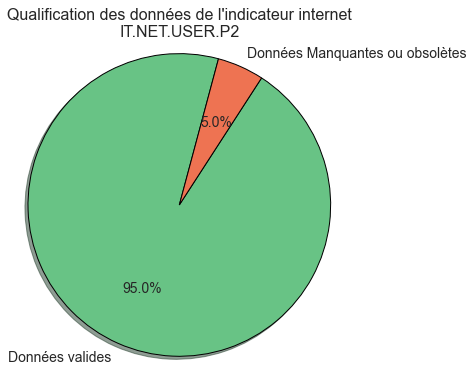

In [156]:
fig = plt.figure(figsize=(6,6))
plt.title("Qualification des données de l'indicateur internet\nIT.NET.USER.P2", fontsize=16)
plt.pie(int_df['Valid'].value_counts(), labels=['Données valides', 'Données Manquantes ou obsolètes'], 
        colors=['#68C385', '#EE7352'], autopct='%1.1f%%', textprops={'fontsize': 14},
        shadow=True, wedgeprops={'linewidth':1, 'edgecolor':'black'}, startangle=75)
plt.axis('equal')
# plt.savefig("indic_internet_pie.png", orientation='landscape', bbox_inches='tight', quality=0.95)
plt.show()


### Grace a la fonction suivante nous obtenons les indicateurs statistiques standards sur les dernières données enregistrées

In [157]:
def get_describe(df):
    df_2 = df.copy()
    cols = df_2.columns
    df_2 = df_2.dropna()
    df_2[cols[0]] = df_2[cols[0]].apply(float)
    df_2[cols[1]] =  df_2[cols[1]].apply(float)
    return df_2.describe()

In [158]:
get_describe(int_df)

,Last statement,Rate
count,233.000000,233.000000
mean,2015.532189,50.112632
std,3.072408,28.359197
min,1990.000000,0.000000
25%,2016.000000,25.246250
50%,2016.000000,52.481808
75%,2016.000000,75.497623
max,2016.000000,98.240016


In [159]:
last_statements = []
no_statements = 0
for country in data_internet['Country Name'].unique():
    last_statement = get_last_statement(code_indic_internet, country)
    if last_statement == None:
        no_statements += 1
    else:
        last_statements.append(last_statement)

In [160]:
last_statements = pd.Series(last_statements).value_counts()

In [161]:
last_statements = last_statements.sort_values()

In [162]:
last_statements.index.values

array(['2012', '2011', '2015', '2004', '1990', '2013', '2016'],
      dtype=object)

In [163]:
from bokeh.io import show, output_notebook, export_svgs, export_png
from bokeh.models import ColumnDataSource, Grid, HBar, Label
from bokeh.plotting import figure


output_notebook()

# y= [float(statement) for statement in last_statements.index.values]
y = list(last_statements.index.values)
x = last_statements.values

source = ColumnDataSource(data=dict(y=y, right=x,))
TOOLS = "save"
plot = figure(x_range=(0, max(x)+5), y_range=y, plot_height=350, title="Aperçu de la fraicheur des données de l'indicateur Internet users",
           toolbar_location='right', tools=TOOLS)
plot.xaxis.axis_label = "Nombre de pays référencés"

plot.hbar(y="y", right="right", left=0, height=0.5, fill_color="#b3de69", source=source)
# mytext = Label(x=100, y=70, text='here your text')
# plot.add_layout(mytext)


# plot.output_backend = "svg"
# export_svgs(plot, filename="internet_fresh.svg")
show(plot)


Loading BokehJS ...

In [164]:
type(pays_internet_suffisant)

pandas.core.series.Series

In [165]:
country_ok = []
country_ko = []
for country in pays_sans_releves_2016:
    last_statement = get_last_statement(code_indic_internet, country)
    if last_statement == None:
        country_ko.append(country)
    else:
        last_value = data[(data['Indicator Code'] == code_indic_internet) & (data['Country Name'] == country)][last_statement].iloc[0]
        print(country, last_value, last_statement)
        if last_value >= 65: # Plus grande tolérance due à une plus grande ancienneté
            country_ok.append(country)
        else:
            country_ko.append(country)
print(country_ok)
print(country_ko)
country_ok = pd.Series(country_ok)
pays_internet_suffisant = pays_internet_suffisant.append(country_ok)

Arab World 36.8686015566291 2013
European Union 75.4976231672564 2013
OECD members 75.3900096548774 2013
American Samoa 0.0 1990
Korea, Dem. People’s Rep. 0.0 2012
New Caledonia 74.00175279 2015
Northern Mariana Islands 0.0 1990
Palau 26.97033263 2004
San Marino 49.6 2011
Turks and Caicos Islands 0.0 1990
['European Union', 'OECD members', 'New Caledonia']
['Arab World', 'American Samoa', 'Channel Islands', 'Curacao', 'Isle of Man', 'Korea, Dem. People’s Rep.', 'Kosovo', 'Nauru', 'Northern Mariana Islands', 'Palau', 'San Marino', 'Sint Maarten (Dutch part)', 'South Sudan', 'St. Martin (French part)', 'Turks and Caicos Islands']


In [166]:
len(pays_internet_suffisant)

62

In [167]:
pays_selection = pays_internet_suffisant.copy()

### Regardons maintenant la population de chacun de ces pays. En effet, si le pays est très peu peuplé il n'est pas necessaire de s'y implanter car cela demande un investissement important de s'y implanter (demarches légales, traduction eventuelles etc...)

Après une recherche sur le site de la banque mondiale, je veux utiliser l'indicateut qui s'appelle : 'Population, total'

In [168]:
code_indic_pop = 'SP.POP.TOTL'
data_pop = data[data['Indicator Code'] == code_indic_pop]

In [169]:
data_pop.head(2)

,Country Name,Country Code,Indicator_name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2090,2095,2100,Topic,Long definition,Source,Special Notes,Region,Income Group,Latest population census
2490,Arab World,ARB,"Population, total",SP.POP.TOTL,1.234009e+08,1.267261e+08,1.300956e+08,1.335924e+08,1.373274e+08,1.413761e+08,...,NaN,NaN,NaN,Health: Population: Structure,Total population is based on the de facto defi...,(1) United Nations Population Division. World ...,Arab World aggregate. Arab World is composed o...,NaN,NaN,NaN
6102,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1.288581e+09,1.322182e+09,1.354003e+09,1.384272e+09,1.414385e+09,1.441542e+09,...,NaN,NaN,NaN,Health: Population: Structure,Total population is based on the de facto defi...,(1) United Nations Population Division. World ...,East Asia and Pacific regional aggregate (incl...,NaN,NaN,NaN


Arbitrairement, je vais eliminer les pays se situant en dessous du 25eme centile en terme de population.

In [170]:
help(get_last_statement)

Help on function get_last_statement in module __main__:

get_last_statement(indicateur, country)
    Cette fonction prends un indicateur (code) et un pays et retourne l'année du dernier relevé



In [171]:
last_pop_values = []
last_pop_years = []
for country in data_pop["Country Name"].unique():
    last_pop_year = get_last_statement(code_indic_pop, country)
    if last_pop_year == None:
        last_pop_years.append(np.nan)
        last_pop_values.append(np.nan)
    else:
        last_pop_years.append(last_pop_year)
        last_pop_value = data[(data['Indicator Code'] == code_indic_pop) & (data['Country Name'] == country)][last_pop_year].iloc[0]
        last_pop_values.append(last_pop_value)

In [172]:
pop_df = pd.DataFrame([data['Country Name'].unique(), last_pop_years, last_pop_values])

In [173]:
pop_df = pop_df.T

In [174]:
pop_df = pop_df.rename(columns={0: 'Country', 1: "Last statement", 2: "Population"})

In [175]:
pop_df = pop_df.set_index('Country')

In [176]:
pop_df

,Last statement,Population
Country,,
Arab World,2013,3.69762e+08
East Asia & Pacific,2016,2.29679e+09
East Asia & Pacific (excluding high income),2016,2.05143e+09
Euro area,2016,3.40895e+08
Europe & Central Asia,2016,9.11995e+08
...,...,...
Virgin Islands (U.S.),2016,102951
West Bank and Gaza,2016,4.55157e+06
"Yemen, Rep.",2016,2.75842e+07


In [177]:
pop_df['Valid'] = pop_df['Last statement'].map(data_qualification)

In [178]:
pop_df['Valid'].value_counts()

True     240
False      1
Name: Valid, dtype: int64

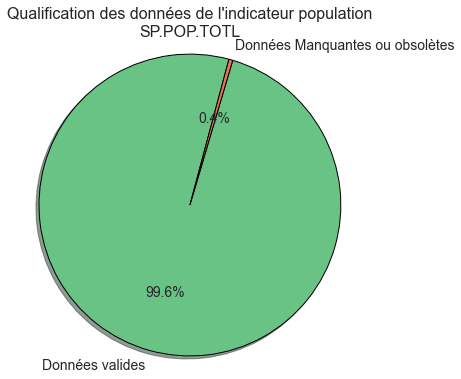

In [179]:
fig = plt.figure(figsize=(6,6))
plt.title("Qualification des données de l'indicateur population\n{}".format(code_indic_pop), fontsize=16)
plt.pie(pop_df['Valid'].value_counts(), labels=['Données valides', 'Données Manquantes ou obsolètes'], 
        colors=['#68C385', '#EE7352'], autopct='%1.1f%%', textprops={'fontsize': 14},
        shadow=True, wedgeprops={'linewidth':1, 'edgecolor':'black'}, startangle=75)
plt.axis('equal')
# plt.savefig("indic_pop_pie.png", orientation='landscape', bbox_inches='tight', quality=0.95)
plt.show()

In [180]:
get_describe(pop_df)

,Last statement,Population
count,240.000000,2.400000e+02
mean,2015.891667,2.094884e+08
std,0.597006,8.119465e+08
min,2011.000000,1.109700e+04
25%,2016.000000,1.304528e+06
50%,2016.000000,8.741154e+06
75%,2016.000000,3.835572e+07
max,2016.000000,7.442136e+09


In [181]:
last_statements = pd.Series(last_pop_years).value_counts()

In [182]:
last_statements = last_statements.sort_values()

In [183]:
output_notebook()

# y= [float(statement) for statement in last_statements.index.values]
y = list(last_statements.index.values)
x = last_statements.values

source = ColumnDataSource(data=dict(y=y, right=x,))

plot = figure(x_range=(0,max(last_statements.values) + 10), y_range=y, plot_height=350, title="Aperçu de la fraicheur des données sur la population",
           toolbar_location=None, tools="")

plot.hbar(y="y", right="right", left=0, height=0.5, fill_color="#b3de69", source=source)
plot.xaxis.axis_label = "Nombre de pays référencés"
# plot.output_backend = "svg"
# export_svgs(plot, filename="pop_fresh.svg")
show(plot)

Loading BokehJS ...

L'indicateur sur la population nationale de chaque pays est 'à jour' au regard du dataset

In [184]:
percentile_25 = pop_df['Population'].quantile(0.25)
percentile_25

1304528.5

In [185]:
pop_suffisantes_df = pop_df[pop_df['Population'] > percentile_25]

In [186]:
pays_pop_suffisantes = pop_suffisantes_df.index.values

In [187]:
len(pays_pop_suffisantes)

180

Nous avons récupéré les pays dont la population est suffisante et ou l'accès à internet est suffisant

Pour mettre à jour notre selection on peut faire une intersection entre ces deux listes

In [188]:
pays_selection = pays_selection.values

In [189]:
pays_selection = [country for country in pays_pop_suffisantes if country in pays_selection]

In [190]:
len(pays_selection)

43

### Regardons maintenant l'alphabetisation

In [191]:
indicateurs_literacy = []
indicateurs = data['Indicator_name'].unique()
for indicateur in indicateurs:
    indicateur_clean = indicateur.replace(',', '')
    mots = indicateur_clean.split(' ')
    if 'literacy' in [mot.lower() for mot in mots]:
        indicateurs_literacy.append(indicateur)
len(indicateurs_literacy)

47

In [192]:
indicateurs_literacy

['Adult literacy rate, population 15+ years, both sexes (%)',
 'Adult literacy rate, population 15+ years, female (%)',
 'Adult literacy rate, population 15+ years, male (%)',
 'Elderly literacy rate, population 65+ years, both sexes (%)',
 'Elderly literacy rate, population 65+ years, gender parity index (GPI)',
 'Literacy rate, population 25-64 years, both sexes (%)',
 'Literacy rate, population 25-64 years, female (%)',
 'Literacy rate, population 25-64 years, gender parity index (GPI)',
 'Literacy rate, population 25-64 years, male (%)',
 'PIAAC: Adults by literacy proficiency level (%). Below Level 1',
 'PIAAC: Adults by literacy proficiency level (%). Level 1',
 'PIAAC: Adults by literacy proficiency level (%). Level 2',
 'PIAAC: Adults by literacy proficiency level (%). Level 3',
 'PIAAC: Adults by literacy proficiency level (%). Level 4',
 'PIAAC: Adults by literacy proficiency level (%). Level 5',
 'PIAAC: Distribution of Adult Literacy Scores: 10th Percentile Score',
 'PIAAC:

#### Deux indicateurs correspondent au besoin:
##### - Adult literacy rate, population 15+ years, both sexes (%) 
Cet indicateur permet d'evaluer largement l'alphabetisation.
##### - Youth literacy rate, population 15-24 years, both sexes (%)
Celui-ci est plus orienté vers les très jeunes.

### Etant donné que l'on s'oriente vers un marché universitaire je décide de prendre l'indicateur qui concerne la population jeune

In [193]:
indic_literacy = 'Youth literacy rate, population 15-24 years, both sexes (%)'

In [194]:
data_literacy = data[data['Indicator_name'] == indic_literacy]
code_indic_literacy = data_literacy['Indicator Code'].iloc[0]
code_indic_literacy

'SE.ADT.1524.LT.ZS'

In [195]:
last_lit_values = []
last_lit_years = []
for country in data_literacy["Country Name"].unique():
    last_lit_year = get_last_statement(code_indic_literacy, country)
    if last_lit_year == None:
        last_lit_years.append(np.nan)
        last_lit_values.append(np.nan)
    else:
        last_lit_years.append(last_lit_year)
        last_lit_value = data[(data['Indicator Code'] == code_indic_literacy) & (data['Country Name'] == country)][last_lit_year].iloc[0]
        last_lit_values.append(last_lit_value)

In [196]:
lit_df = pd.DataFrame([data['Country Name'].unique(), last_lit_years, last_lit_values])

In [197]:
lit_df = lit_df.T

In [198]:
lit_df = lit_df.rename(columns={0: 'Country', 1: "Last statement", 2: "Literacy rate"})

In [199]:
lit_df = lit_df.set_index('Country')

In [200]:
lit_df

,Last statement,Literacy rate
Country,,
Arab World,2014,88.9647
East Asia & Pacific,2014,99.0044
East Asia & Pacific (excluding high income),2014,98.9691
Euro area,NaN,NaN
Europe & Central Asia,2014,99.7114
...,...,...
Virgin Islands (U.S.),NaN,NaN
West Bank and Gaza,2016,99.3837
"Yemen, Rep.",1994,60.2221


In [201]:
lit_df['Valid'] = lit_df['Last statement'].map(data_qualification)

In [202]:
lit_df['Valid'].value_counts()

True     142
False     99
Name: Valid, dtype: int64

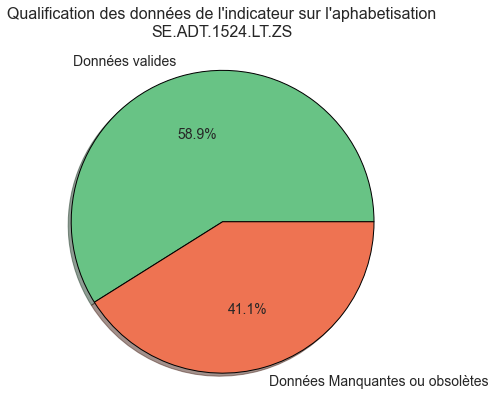

In [203]:
fig = plt.figure(figsize=(6,6))
plt.title("Qualification des données de l'indicateur sur l'aphabetisation\n{}\n".format(code_indic_literacy), fontsize=16)
plt.pie(lit_df['Valid'].value_counts(), labels=['Données valides', 'Données Manquantes ou obsolètes'], 
        colors=['#68C385', '#EE7352'], autopct='%1.1f%%', textprops={'fontsize': 14},
        shadow=True, wedgeprops={'linewidth':1, 'edgecolor':'black'})
plt.axis('equal')
# plt.savefig("indic_lit_pie.png", orientation='landscape', bbox_inches='tight', quality=0.95)
plt.show()

In [204]:
get_describe(lit_df)

,Last statement,Literacy rate
count,184.000000,184.000000
mean,2009.788043,88.770548
std,8.258373,16.383599
min,1970.000000,23.523780
25%,2010.000000,84.931420
50%,2012.000000,97.928251
75%,2014.000000,99.237583
max,2016.000000,100.000000


In [205]:
last_statements = pd.Series(last_lit_years).value_counts()

In [206]:
last_statements = last_statements.sort_values()

In [207]:
output_notebook()

# y= [float(statement) for statement in last_statements.index.values]
y = list(last_statements.index.values)
x = last_statements.values

source = ColumnDataSource(data=dict(y=y, right=x,))

plot = figure(x_range=(0,max(last_statements.values) + 2), y_range=y, plot_height=350, title="Aperçu de la fraicheur des données sur l'alphabetisation",
           toolbar_location=None, tools="")
plot.xaxis.axis_label = "Nombre de pays référencés"
plot.hbar(y="y", right="right", left=0, height=0.5, fill_color="#b3de69", source=source)
# plot.output_backend = "svg"
# export_svgs(plot, filename="lit_fresh.svg")

show(plot)

Loading BokehJS ...

Cette donnée sur la literacy est beaucoup plus irrégulière. il faudra y faire attention

Que faire des pays non renseignés? +50 pays sans relevés

In [208]:
lit_suffisant_df = lit_df.dropna()
lit_suffisant_df['Last statement'] = lit_suffisant_df['Last statement'].map(float)
lit_suffisant_df = lit_suffisant_df[lit_suffisant_df['Last statement'] >= 2010]

<ipython-input-208-96466c2016e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lit_suffisant_df['Last statement'] = lit_suffisant_df['Last statement'].map(float)


In [209]:
lit_suffisant_df.describe()

,Last statement
count,142.000000
mean,2013.084507
std,1.955146
min,2010.000000
25%,2011.000000
50%,2014.000000
75%,2015.000000
max,2016.000000


In [210]:
percentile_25 = lit_suffisant_df['Literacy rate'].quantile(0.1)
percentile_25

67.5773078918457

J'ai ajusté ici le seuil car le taux de literacy est plutôt haut pour la plupart des pays

In [211]:
lit_suffisant_df = lit_suffisant_df[lit_suffisant_df['Literacy rate'] > percentile_25]

In [212]:
pays_lit_suffisantes = lit_suffisant_df.index.values

In [213]:
len(pays_lit_suffisantes)

127

Nous avons récupéré les pays dont la population est suffisament lettrée

Pour mettre à jour notre selection on peut faire une nouvelle intersection

In [214]:
pays_lit_suffisantes

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Heavily indebted poor countries (HIPC)',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'South Asia', 'Sub-Saharan Africa',
       'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Albania', 'Andorra', 'Angola',
       'Argentina', 'Armenia', 'Aruba', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burundi', 'Cabo Verde',
       'Cameroon', 'Chile', 'China', 'Colombia', 'Comoros',
       'Con

In [215]:
pays_selection = list(set(pays_selection).intersection(set(pays_lit_suffisantes)))
pays_selection

['Qatar',
 'Russian Federation',
 'Latvia',
 'Azerbaijan',
 'Kazakhstan',
 'Bahrain',
 'Malaysia',
 'Spain',
 'Singapore',
 'Kuwait',
 'Puerto Rico',
 'Estonia']

In [216]:
len(pays_selection)

12

Cette liste constitue un premier resultat interessant. On identifie des pays emergeant et developpés. Cependant la méthode utilisée est très critiquable car elle elimine a chaque nouveau paramètre évalué les pays dont on n'a pas la donnée. Par ailleurs, je note ici l'absence du Brésil qui est à mon avis un pays très important et qui ne passe pas le filtre du paramêtre internet.

## Critère GDP 

#### On veut investir dans un pays qui a un minimum d'activités économiques

In [217]:
code_indic_gdp = 'NY.GDP.MKTP.CD'
data_gdp = data[data['Indicator Code'] == code_indic_gdp]
name_indic_gdp = data[data['Indicator_name'] == code_indic_gdp]

In [218]:
name_indic_gdp

,Country Name,Country Code,Indicator_name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2090,2095,2100,Topic,Long definition,Source,Special Notes,Region,Income Group,Latest population census


In [219]:
len(data_gdp['Country Name'].unique())

241

In [220]:
last_gdp_values = []
last_gdp_years = []
for country in data_gdp["Country Name"].unique():
    last_gdp_year = get_last_statement(code_indic_gdp, country)
    if last_gdp_year == None:
        last_gdp_years.append(np.nan)
        last_gdp_values.append(np.nan)
    else:
        last_gdp_years.append(last_gdp_year)
        last_gdp_value = data_gdp[(data_gdp['Indicator Code'] == code_indic_gdp) & (data_gdp['Country Name'] == country)][last_gdp_year].iloc[0]
        last_gdp_values.append(last_gdp_value)

In [221]:
gdp_df = pd.DataFrame([data_gdp['Country Name'].unique(), last_gdp_years, last_gdp_values])

In [222]:
gdp_df = gdp_df.T

In [223]:
gdp_df = gdp_df.rename(columns={0: 'Country', 1: "Last statement", 2: "GDP"})

In [224]:
gdp_df = gdp_df.set_index('Country')

In [225]:
gdp_df['Valid'] = gdp_df['Last statement'].map(data_qualification)

In [226]:
gdp_df['Valid'].value_counts()

True     229
False     12
Name: Valid, dtype: int64

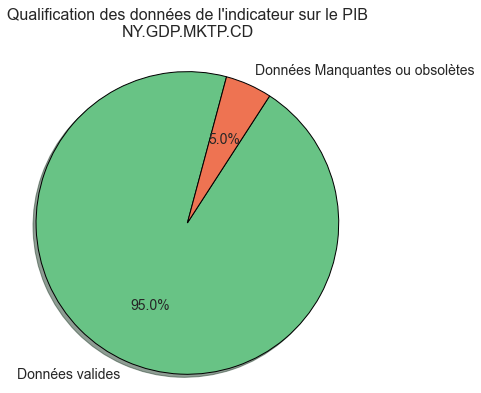

In [227]:
fig = plt.figure(figsize=(6,6))
plt.title("Qualification des données de l'indicateur sur le PIB\n{}\n".format(code_indic_gdp), fontsize=16)
plt.pie(gdp_df['Valid'].value_counts(), labels=['Données valides', 'Données Manquantes ou obsolètes'], 
        colors=['#68C385', '#EE7352'], autopct='%1.1f%%', textprops={'fontsize': 14},
        shadow=True, wedgeprops={'linewidth':1, 'edgecolor':'black'}, startangle=75)
plt.axis('equal')
# plt.savefig("indic_pib_pie.png", orientation='landscape', bbox_inches='tight', quality=0.95)
plt.show()

In [228]:
get_describe(gdp_df)

,Last statement,GDP
count,234.000000,2.340000e+02
mean,2015.542735,1.981040e+12
std,1.954496,7.763468e+12
min,2000.000000,3.421888e+07
25%,2016.000000,6.674796e+09
50%,2016.000000,3.711016e+10
75%,2016.000000,3.150335e+11
max,2016.000000,7.584511e+13


In [229]:
last_statements = pd.Series(last_gdp_years).value_counts()

In [230]:
last_statements = last_statements.sort_values()

In [231]:
output_notebook()

# y= [float(statement) for statement in last_statements.index.values]
y = list(last_statements.index.values)
x = last_statements.values

source = ColumnDataSource(data=dict(y=y, right=x,))

plot = figure(x_range=(0,max(last_statements.values) + 10), y_range=y, plot_height=350, title="Aperçu de la fraicheur des données sur le PIB",
           toolbar_location=None, tools="")
plot.xaxis.axis_label = 'Nombre de pays référencés'
plot.hbar(y="y", right="right", left=0, height=0.5, fill_color="#b3de69", source=source)
# plot.output_backend = "svg"
# export_svgs(plot, filename="pib_fresh.svg")

show(plot)

Loading BokehJS ...

In [232]:
gdp_suffisant_df = gdp_df[gdp_df.Valid]
percentile = gdp_suffisant_df["GDP"].quantile(0.25)
print(percentile)
gdp_suffisant_df = gdp_suffisant_df[gdp_suffisant_df['GDP'] > percentile]
pays_gdp_suffisant = gdp_suffisant_df.index.values

6792417112.29947


In [233]:
len(pays_gdp_suffisant)

171

In [234]:
pays_selection = list(set(pays_selection).intersection(set(pays_gdp_suffisant)))
pays_selection

['Qatar',
 'Latvia',
 'Russian Federation',
 'Azerbaijan',
 'Kazakhstan',
 'Bahrain',
 'Malaysia',
 'Spain',
 'Singapore',
 'Kuwait',
 'Puerto Rico',
 'Estonia']

Grace à cette première approche exclusive, on retrouve quelques pays interessants. Cependant, il reste du travail.

Il serait probablement mieux d'attribuer un score à chaque pays et selectionner les pays à partir d'un certain score. En effet ici, nous eliminons les pays dont on n'a pas les données ce qui est à mon avis une erreur

Avant de mettre en place cette méthode qui demande une toute autre approche, nous allons rassembler les filtres 'internet users' et 'population' en un seul.
L'idée est d'éliminer le dernier quartile non pas sur chacune des données mais sur le produit des deux. En effet, nous voulons qu'il y ait beaucoup d'internet users. Cela n'a pas de sens d'éliminer un pays entier parce que le taux d'internet users est trop faible alors que par ailleurs ce pays a beaucoup d'individus.

In [235]:
int_df['nb_users'] = int_df['Rate'] * pop_df['Population']

In [236]:
lit_df

,Last statement,Literacy rate,Valid
Country,,,
Arab World,2014,88.9647,True
East Asia & Pacific,2014,99.0044,True
East Asia & Pacific (excluding high income),2014,98.9691,True
Euro area,NaN,NaN,False
Europe & Central Asia,2014,99.7114,True
...,...,...,...
Virgin Islands (U.S.),NaN,NaN,False
West Bank and Gaza,2016,99.3837,True
"Yemen, Rep.",1994,60.2221,False


Nous allons maintenant refaire la selection

In [237]:
percentile_internet = int_df['nb_users'].quantile(0.75)
percentile_literacy = lit_df['Literacy rate'].quantile(0.50)
percentile_gdp = gdp_df['GDP'].quantile(0.50)

In [238]:
print(len(list(int_df[int_df['nb_users'] > percentile_internet].index.values)),
      len(list(lit_df[lit_df['Literacy rate'] > percentile_literacy].index.values)),
      len(list(gdp_df[gdp_df['GDP'] > percentile_gdp].index.values)))

58 92 117


In [239]:
pays_selection_2 = np.intersect1d(list(int_df[int_df['nb_users'] > percentile_internet].index.values),
                                  list(lit_df[lit_df['Literacy rate'] > percentile_literacy].index.values),
                                  list(gdp_df[gdp_df['GDP'] > percentile_gdp].index.values))

In [240]:
len(pays_selection_2)

23

In [241]:
pays_selection_2

array(['Argentina', 'Brazil', 'China', 'Colombia', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'Indonesia',
       'Iran, Islamic Rep.', 'Italy', 'Malaysia', 'Mexico', 'Philippines',
       'Poland', 'Russian Federation', 'Saudi Arabia', 'South Africa',
       'Spain', 'Thailand', 'Turkey', 'Ukraine', 'Upper middle income'],
      dtype='<U50')

In [242]:
pays_selection_3 = np.array(['Argentina', 'Brazil', 'China', 'Colombia', 'Indonesia',
       'Iran, Islamic Rep.', 'Italy', 'Malaysia', 'Mexico', 'Philippines',
       'Poland', 'Russian Federation', 'Saudi Arabia', 'South Africa',
       'Spain', 'Thailand', 'Turkey', 'Ukraine'])

In [243]:
len(pays_selection_3)

18

<a id='section_4'></a>
# Visualisation et projections

Dans cette dernière partie nous selectionnerons des indicateurs donnant des projections sur le nombre d'élèves et nous ferons une visualisation par pays du comportement de chacun des indicateurs retenus

##### Afin d'effectuer des projections sur la quantité de clients possibles pour les pays selectionnés nous allons observer ces indicateur:
##### Wittgenstein Projection: Population in thousands by highest level of educational attainment. Lower Secondary. Total
##### Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total

#### En observant les comportements de ces deux indicateurs nous pourrons savoir si la population étudiant entre le début du secondaire et les études supérieurees augmentent ou non. Il faut que le premier diminue dans un futur proche et que le second augmente dans un futur proche

In [244]:
nom_indic_projection_post = 'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total'
nom_indic_projection_lower = 'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Lower Secondary. Total'
code_indic_projection_post = data[data["Indicator_name"] == nom_indic_projection_post]['Indicator Code'].iloc[0]
code_indic_projection_lower = data[data["Indicator_name"] == nom_indic_projection_lower]['Indicator Code'].iloc[0]

Nous allons maintenant explorer l'évolution dans le temps des indicateurs observés

In [245]:
def get_graph(country, code_indic):
    years = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100']
    df = data[(data['Country Name'] == country) & (data['Indicator Code'] == code_indic)]
    titre = df['Indicator_name'].values[0]
    fig = plt.figure(figsize=(12,8))
    plt.style.use('seaborn-whitegrid')
    plt.title("Evolution de l'indicateur {}".format(titre), fontsize=17)
    plt.scatter(years, df[years])
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel(titre, fontsize=15)
    

In [246]:
years = np.array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'])

In [247]:
# from bokeh.document import Document
# from bokeh.embed import file_html
from bokeh.layouts import column, gridplot
from bokeh.models import (Circle, ColumnDataSource, Div, Grid,
                          Line, LinearAxis, Plot, Range1d)
from bokeh.models import Div
from bokeh.palettes import Category10


def country_dataviz(country):
    pallette = Category10[6]
    output_notebook()

#     country = 'Italy'
    indicateurs = [code_indic_internet, code_indic_pop,
                   code_indic_literacy, code_indic_gdp,
                   code_indic_projection_lower, code_indic_projection_post]
    df_source = []
    circles_sources_list = []
    i = 0
    for code_indic in indicateurs:

        df = data[(data['Country Name'] == country) & (data['Indicator Code'] == code_indic)]
        df = df[years].T
        df = df.dropna()
        df['Years'] = df.index.map(int)
        df['Color'] = [pallette[i] for k in range(len(df['Years']))]
        df = df.rename(columns={df.columns[0]:'Data'})
        df_source.append(df)
        circles_src = ColumnDataSource(data = dict(xi = df['Years'], yi = df['Data'], color=df['Color']))
        circles_sources_list.append(circles_src)
        i += 1


    def make_plot(title, xname, yname, color, circles_source, xdr, ydr):
        plot = Plot(x_range=xdr, y_range=ydr, plot_width=350, plot_height=350,
                    background_fill_color='#efefef')
        plot.title.text = title

        xaxis = LinearAxis(axis_line_color=None)
        plot.add_layout(xaxis, 'below')

        yaxis = LinearAxis(axis_line_color=None)
        plot.add_layout(yaxis, 'left')

        plot.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
        plot.add_layout(Grid(dimension=1, ticker=yaxis.ticker))

    #     line = Line(x='x', y='y', line_color="#666699", line_width=2)
    #     plot.add_glyph(lines_source, line)

        circle = Circle(
            x=xname, y=yname, size=8,
            fill_color=color, line_color=color, fill_alpha=0.5
        )
        plot.add_glyph(circles_source, circle)

        return plot

    #where will this comment show up
    I   = make_plot('Internet users per 100 people',  'xi',   'yi', 'color', circles_sources_list[0],
                    Range1d(start=min(df_source[0]['Years']) - 5, end=max(df_source[0]['Years']) + 5), 
                    Range1d(start=min(df_source[0]['Data']) - 2, end=max(df_source[0]['Data']) + 2)
                    )

    II  = make_plot('Population',  'xi',  'yi', 'color', circles_sources_list[1],
                    Range1d(start=min(df_source[1]['Years']) - 5, end=max(df_source[1]['Years']) + 5),
                    Range1d(start=min(df_source[1]['Data']) - 1000000, end=max(df_source[1]['Data']) + 1000000))

    III = make_plot('Literacy Rate (%)', 'xi', 'yi', 'color', circles_sources_list[2],
                    Range1d(start=min(df_source[2]['Years']) - 5, end=max(df_source[2]['Years']) + 5),
                    Range1d(start=min(df_source[2]['Data']) - 2, end=max(df_source[2]['Data']) + 2 ))

    IV  = make_plot('GDP (USD)',  'xi',  'yi', 'color',  circles_sources_list[3],
                    Range1d(start=min(df_source[3]['Years']) - 5, end=max(df_source[3]['Years']) + 5),
                    Range1d(start=min(df_source[3]['Data']) - 10000000000, end=max(df_source[3]['Data']) + 10000000000))

    V   = make_plot('Thousands of almunis attaining Lower Secondary', 'xi', 'yi', 'color', circles_sources_list[4],
                    Range1d(start=min(df_source[4]['Years']) - 5, end=max(df_source[4]['Years']) + 5),
                    Range1d(start=min(df_source[4]['Data']) - 10/100*min(df_source[4]['Data']), 
                            end=max(df_source[4]['Data']) + 10/100*max(df_source[4]['Data']))
                   )

    VI   = make_plot('Thousands of almunis attaining Post Secondary', 'xi', 'yi', 'color', circles_sources_list[5],
                    Range1d(start=min(df_source[5]['Years']) - 5, end=max(df_source[5]['Years']) + 5),
                    Range1d(start=min(df_source[5]['Data']) - 10/100*min(df_source[5]['Data']), 
                            end=max(df_source[5]['Data']) + 10/100*max(df_source[5]['Data']))
                   )

    title = Div(text=f"Pays : {country}", style={'font-size': '200%', 'color': 'black', 'text-align':'center'})

    #title = Div(text=""" f"Pays : {country}" """)

    grid = gridplot([[I, II, V], [III, IV, VI]], toolbar_location=None)

    show(column(title, grid))

In [248]:
for country in pays_selection_3:
    country_dataviz(country)

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

<a id='section_5'></a>
# Conclusion

Cette base de données nous donne une quantité non négligeable de données venant du monde entier sur des sujets divers et bien référencés. Bien que la donnée brute semble mal renseignée et desordonnée au premier abord elle est finalement très utile lorsque l'on se sert de https://data.worldbank.org/ pour chercher les indicateurs. Sans aucun doute, elle peut etre utilisée pour identifier des prospects de nouveaux marché pour EdTech. Grâce aux outils developpés dans ce notebook, on peut facilement visualiser par pays les comportements des indicateurs ciblés. 
Concernant la methode de selection des pays, celle que j'ai utilisée est arbirtraire et personnelle et je pense qu'un systême de scoring type marketing serait bien plus efficace pour ne pas eliminer automatiquement les pays dont certaines données sont manquantes.
Parmis les autres axes d'amélioration, nous pourrions developper un outil de cartes permettant de visaluliser les pays selectionnés sur une carte du monde.
